## Pre-processing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)

date_parser = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%d") 

data_daily  = pd.read_csv("ASX200Daily.csv",parse_dates = ["Date"], 
                         index_col = 'Date', date_parser = date_parser) 

data_monthly = pd.read_csv("ASX200Monthly.csv",parse_dates = ["Date"], 
                         index_col = 'Date', date_parser = date_parser)


close_daily = data_daily["Close"]
close_monthly = data_monthly["Close"]


close_daily.fillna(method='ffill', inplace=True)
#close_monthly.fillna(method='ffill', inplace=True)
close_monthly.dropna(inplace=True)

## Exploratory Time Series: 

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Close')

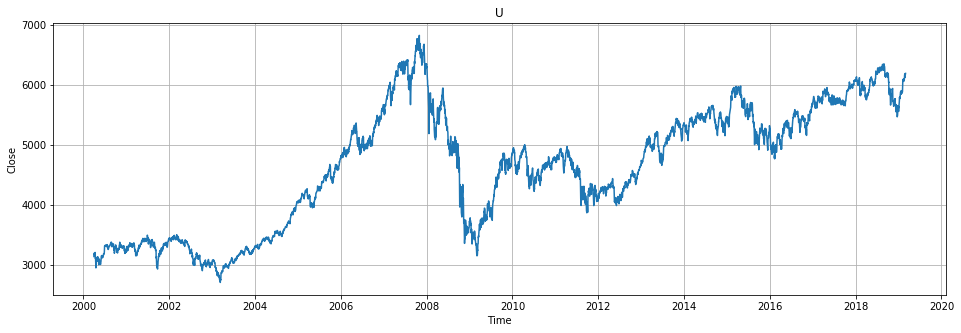

In [2]:
plt.figure(figsize = (16,5))
plt.plot(close_daily)
plt.grid()
plt.title("U")
plt.xlabel("Time")
plt.ylabel("Close")

Text(0, 0.5, 'Close')

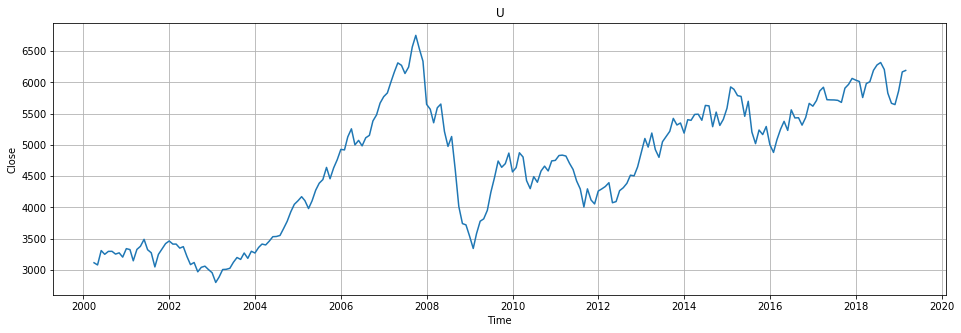

In [3]:
plt.figure(figsize = (16,5))
plt.plot(close_monthly)
plt.grid()
plt.title("U")
plt.xlabel("Time")
plt.ylabel("Close")

In [4]:
close_daily.describe()

count    4821.000000
mean     4628.595748
std      1011.721356
min      2700.399902
25%      3557.399902
50%      4739.000000
75%      5452.500000
max      6828.700195
Name: Close, dtype: float64

In [5]:
close_monthly.describe()

count     228.000000
mean     4659.366239
std      1015.291733
min      2800.899902
25%      3707.975037
50%      4758.649902
75%      5483.850098
max      6754.100098
Name: Close, dtype: float64

In [6]:
diff_close_daily = pd.Series.diff(close_daily)
diff_close_monthly = pd.Series.diff(close_monthly)
diff_close_daily.dropna(inplace = True)
diff_close_monthly.dropna(inplace = True)

Text(0, 0.5, 'Difference')

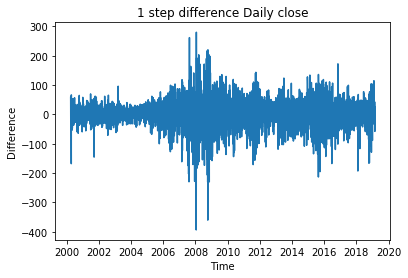

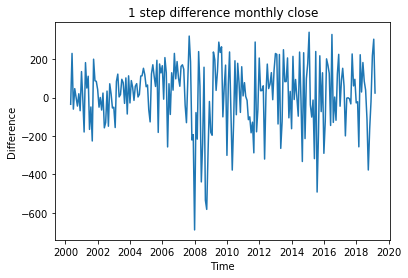

In [7]:
plt.figure()
plt.plot(diff_close_daily)
plt.title("1 step difference Daily close")
plt.xlabel("Time")
plt.ylabel("Difference")


plt.figure()
plt.plot(diff_close_monthly)
plt.title("1 step difference monthly close")
plt.xlabel("Time")
plt.ylabel("Difference")

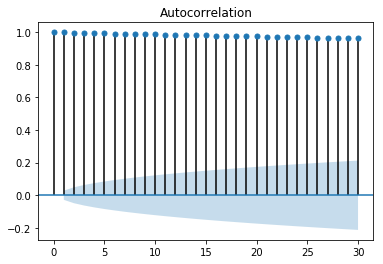

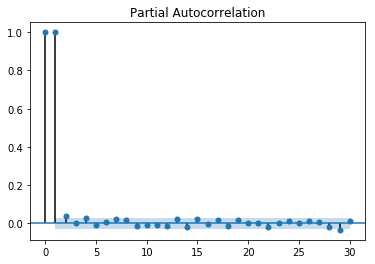

In [8]:
import statsmodels as sm 
import statsmodels.api as smt

smt.graphics.tsa.plot_acf(close_daily, lags = 30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(close_daily, lags=30, alpha=0.05)
plt.show()


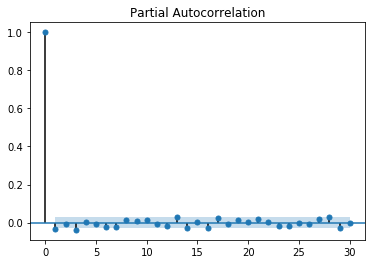

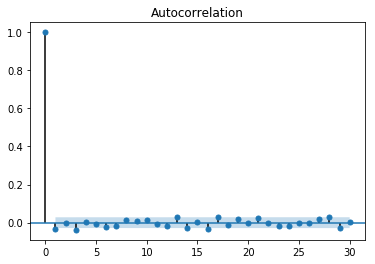

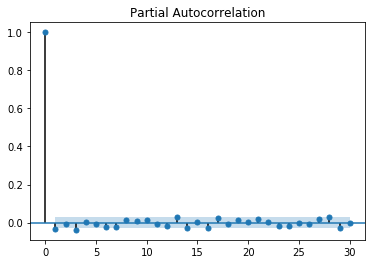

In [9]:
smt.graphics.tsa.plot_acf(diff_close_daily, lags = 30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(diff_close_daily, lags=30, alpha=0.05)

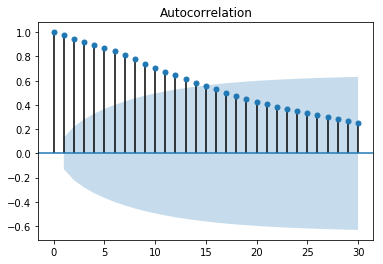

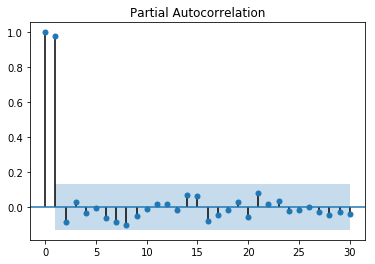

In [10]:
smt.graphics.tsa.plot_acf(close_monthly, lags = 30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(close_monthly, lags=30, alpha=0.05)
plt.show()

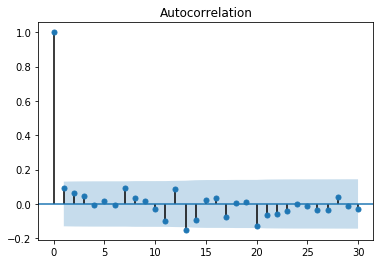

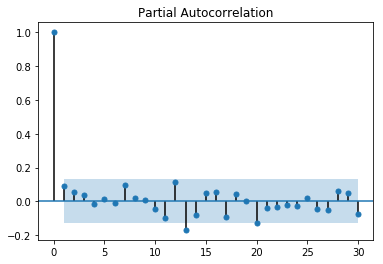

In [11]:
smt.graphics.tsa.plot_acf(diff_close_monthly, lags = 30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(diff_close_monthly, lags=30, alpha=0.05)
plt.show()

Text(0, 0.5, 'Close')

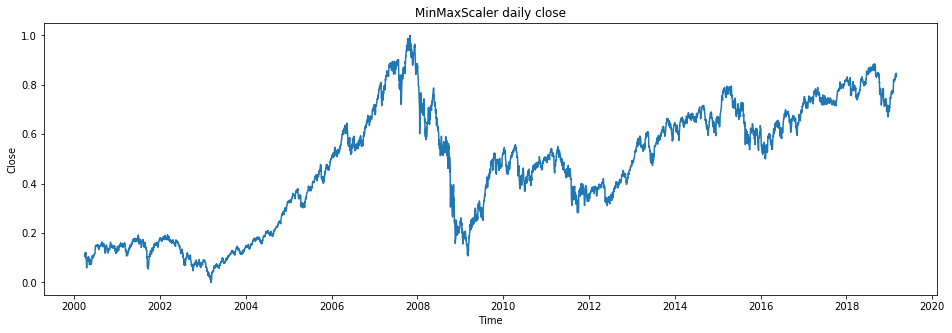

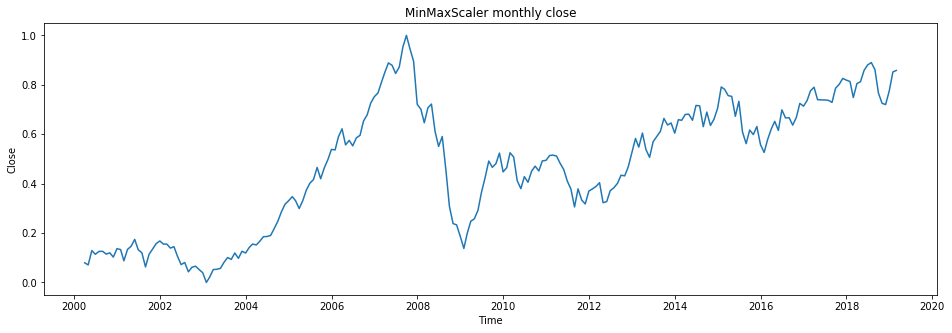

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close_daily_normalize = scaler.fit_transform(close_daily.values.reshape(-1,1))
close_monthly_normalize = scaler.fit_transform(close_monthly.values.reshape(-1,1))




close_daily_normalize_2 = close_daily_normalize.copy()
close_daily_normalize_2 = pd.Series(close_daily_normalize_2.flatten(), index =close_daily.index )
close_monthly_normalize_2 = close_monthly_normalize.copy()
close_monthly_normalize_2 = pd.Series(close_monthly_normalize_2.flatten(), index =close_monthly.index )

plt.figure(figsize = (16,5))
plt.plot(close_daily_normalize_2)
plt.title("MinMaxScaler daily close")
plt.xlabel("Time")
plt.ylabel("Close")


plt.figure(figsize = (16,5))
plt.plot(close_monthly_normalize_2)
plt.title("MinMaxScaler monthly close")
plt.xlabel("Time")
plt.ylabel("Close")

## Benchmark Model: 

### Daily 

In [13]:
import math
validation_size = 5
train_size = len(close_daily) - validation_size
close_daily

Date
2000-03-31    3133.300049
2000-04-03    3191.000000
2000-04-04    3176.800049
2000-04-05    3155.399902
2000-04-06    3157.100098
2000-04-07    3182.000000
2000-04-10    3201.399902
2000-04-11    3173.000000
2000-04-12    3148.699951
2000-04-13    3099.699951
2000-04-14    3111.899902
2000-04-17    2943.899902
2000-04-18    3010.300049
2000-04-19    3069.199951
2000-04-20    3069.199951
2000-04-21    3069.199951
2000-04-24    3069.199951
2000-04-25    3069.199951
2000-04-26    3117.300049
2000-04-27    3106.300049
2000-04-28    3115.800049
2000-05-01    3102.000000
2000-05-02    3131.100098
2000-05-03    3107.500000
2000-05-04    3053.800049
2000-05-05    3107.199951
2000-05-08    3106.199951
2000-05-09    3086.100098
2000-05-10    3043.399902
2000-05-11    2996.399902
                 ...     
2019-01-17    5879.600098
2019-01-20    5890.399902
2019-01-21    5858.799805
2019-01-22    5843.700195
2019-01-23    5865.700195
2019-01-24    5905.600098
2019-01-28    5874.200195
2019-01

In [14]:
train_close_daily = close_daily[:-validation_size]
validation_close_daily  =  close_daily[-validation_size:]
train_close_daily

Date
2000-03-31    3133.300049
2000-04-03    3191.000000
2000-04-04    3176.800049
2000-04-05    3155.399902
2000-04-06    3157.100098
2000-04-07    3182.000000
2000-04-10    3201.399902
2000-04-11    3173.000000
2000-04-12    3148.699951
2000-04-13    3099.699951
2000-04-14    3111.899902
2000-04-17    2943.899902
2000-04-18    3010.300049
2000-04-19    3069.199951
2000-04-20    3069.199951
2000-04-21    3069.199951
2000-04-24    3069.199951
2000-04-25    3069.199951
2000-04-26    3117.300049
2000-04-27    3106.300049
2000-04-28    3115.800049
2000-05-01    3102.000000
2000-05-02    3131.100098
2000-05-03    3107.500000
2000-05-04    3053.800049
2000-05-05    3107.199951
2000-05-08    3106.199951
2000-05-09    3086.100098
2000-05-10    3043.399902
2000-05-11    2996.399902
                 ...     
2019-01-10    5774.600098
2019-01-13    5773.399902
2019-01-14    5814.600098
2019-01-15    5835.200195
2019-01-16    5850.100098
2019-01-17    5879.600098
2019-01-20    5890.399902
2019-01

In [15]:
len(train_close_daily)

4816

In [16]:
validation_close_daily

Date
2019-02-24    6186.299805
2019-02-25    6128.399902
2019-02-26    6150.299805
2019-02-27    6169.000000
2019-03-01    6192.700195
Name: Close, dtype: float64

In [17]:
import time
# validate_time = time.strptime("2019-02-24","%Y-%m-%d")
validate_time = validation_close_daily.index[0]



### 

No handles with labels found to put in legend.


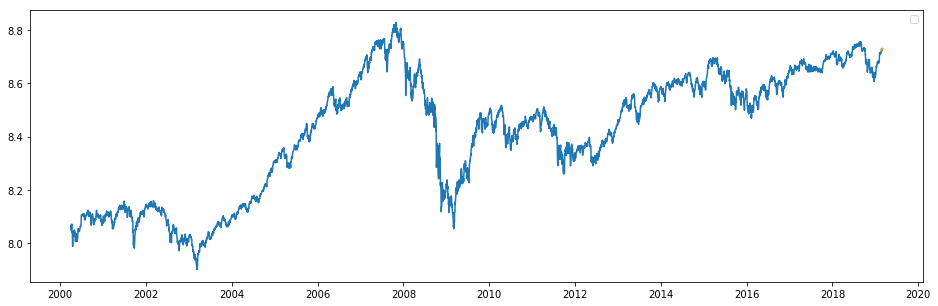

In [18]:
close_daily_log = np.log(close_daily)
train_close_daily_log = np.log(train_close_daily)
validation_close_daily_log = np.log(validation_close_daily)

plt.figure(figsize = (16,5))
plt.plot(train_close_daily_log,label = "")
plt.plot(validation_close_daily_log,label="")

#plt.axvline(validate_time,0,1)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

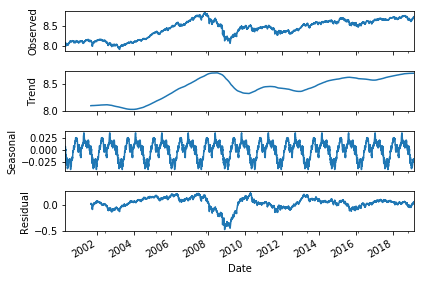

In [20]:
# decomposition method,
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_close_daily_log, model = "additive",freq=365,two_sided=False)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot()
plt.show() 

In [21]:
np.arange(1,train_size+1)

array([   1,    2,    3, ..., 4814, 4815, 4816])

In [22]:
from sklearn.linear_model import LinearRegression
X = np.arange(1,train_size+1)
y = train_close_daily_log-seasonal
X = np.reshape(X, (len(X), 1))
y = y.values.reshape(len(y),1)
#    
lm = LinearRegression()
lm.fit(X, y)
#    
# The coefficients
print("Coefficients: {0}".format(lm.coef_))
# The intercept
print("Intercept: {0}".format(lm.intercept_))
print("Total model: y = {0} + {1} X".format(lm.intercept_,lm.coef_[0]))

print("Variance score (R^2): {0:.2f}".format(lm.score(X, y)))


Coefficients: [[0.00012791]]
Intercept: [8.10654803]
Total model: y = [8.10654803] + [0.00012791] X
Variance score (R^2): 0.61


In [23]:
len(close_daily_log)

4821

In [24]:
seasonal_indice = seasonal[:365]
seasonal_forcast = np.tile(seasonal_indice,14)[:len(close_daily_log)]
len(seasonal_forcast)


4821

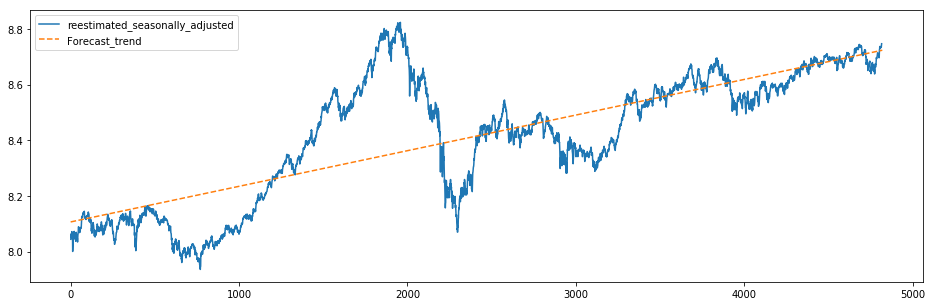

In [25]:
trend_cycle = lm.predict(np.reshape(np.arange(1,len(close_daily_log)+1), (len(close_daily_log),1)))
linear_seasonal_total = pd.Series( (trend_cycle + np.reshape(seasonal_forcast, (len(close_daily_log),1))).reshape(len(close_daily_log),) )
linear_seasonal_total.index = close_daily.index


plt.figure(figsize = (16,5))
plt.plot(X, y, label = "reestimated_seasonally_adjusted")
plt.plot(trend_cycle, linestyle='--', label="Forecast_trend")
plt.legend()
plt.show(block=False)


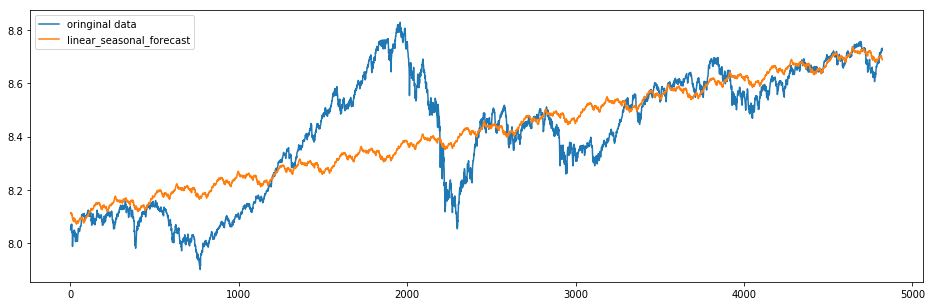

In [26]:
plt.figure(figsize = (16,5))
plt.plot(np.arange(1,len(close_daily_log)+1),close_daily_log,label = "oringinal data")
plt.plot(np.arange(1,len(close_daily_log)+1),linear_seasonal_total,label="linear_seasonal_forecast")

#plt.axvline(validate_time,0,1)
plt.legend()
plt.show()

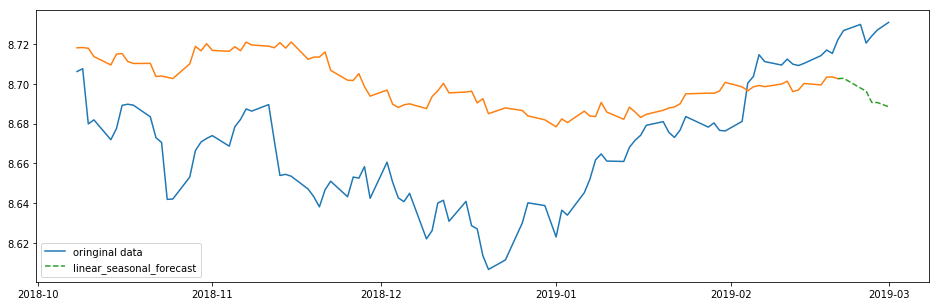

In [27]:
plt.figure(figsize = (16,5))
plt.plot(close_daily_log[-100:],label = "oringinal data")
plt.plot(linear_seasonal_total[-100:-6] )

plt.plot(linear_seasonal_total[-7:],linestyle='--',label="linear_seasonal_forecast")
plt.legend()
plt.show()

In [28]:
def sse(x, y): # sse: sum of squared error
    return np.sum(np.power(x - y, 2))
forecast_set = np.exp(linear_seasonal_total[-validation_size:])
validation_set = np.exp(close_daily_log[-validation_size:].values)
print("SSE for decomposition method \n",sse(forecast_set,validation_set))

SSE for decomposition method 
 216262.35638566618


In [29]:
# Holt


In [30]:
from statsmodels.tsa.holtwinters import Holt
fit1 = Holt(train_close_daily).fit(optimized = True)
smooth_Holt = fit1.fittedvalues


results = pd.DataFrame(index=[r"$\alpha$", 
                              r"$\beta$", 
                              r"$\phi$",  # damped value
                              r"$\gamma$", 
                              r"$l_0$", 
                              "$b_0$", 
                              "SSE"])
params = ['smoothing_level', 
          'smoothing_slope', 
          'damping_slope', 
          'smoothing_seasonal', 
          'initial_level', 
          'initial_slope']

results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results


/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Additive
$\alpha$,9.647889e-01
$\beta$,0.000000e+00
$\phi$,NaN
$\gamma$,NaN
$l_0$,3.134668e+03
$b_0$,6.296182e-01
SSE,1.000626e+07


In [31]:
fit1.sse

10006259.821413716

/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


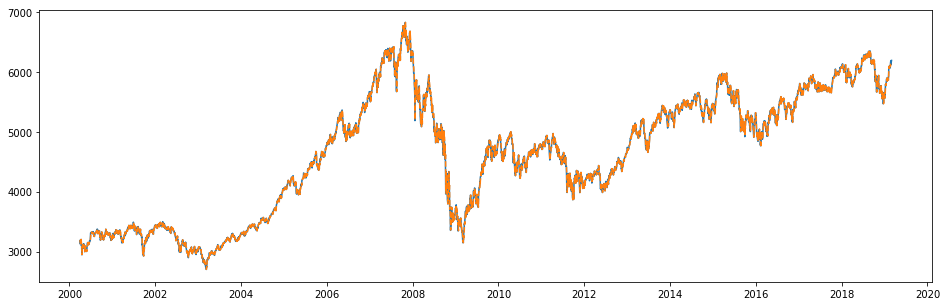

In [32]:
forecast_set = pd.Series(fit1.forecast(validation_size))

forecast_set.index = validation_close_daily.index


plt.figure(figsize = (16,5))
plt.plot(close_daily)

plt.plot(smooth_Holt,linestyle='--')


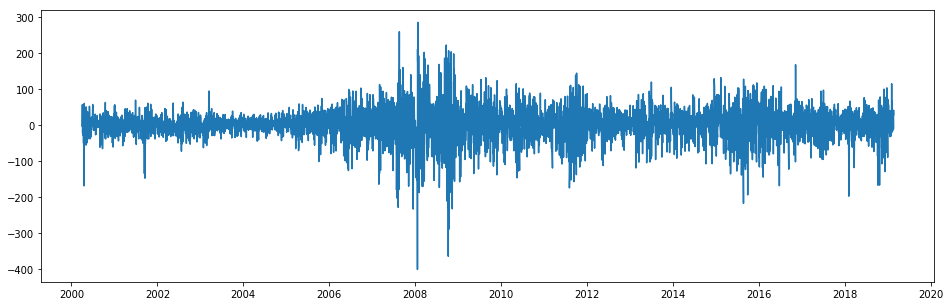

In [33]:
plt.figure(figsize = (16,5))
plt.plot(fit1.resid)


In [34]:
print("RMSE of train set for HOLT\n",rmse(smooth_Holt,train_close_daily))

RMSE of train set for HOLT
 45.581923576545826


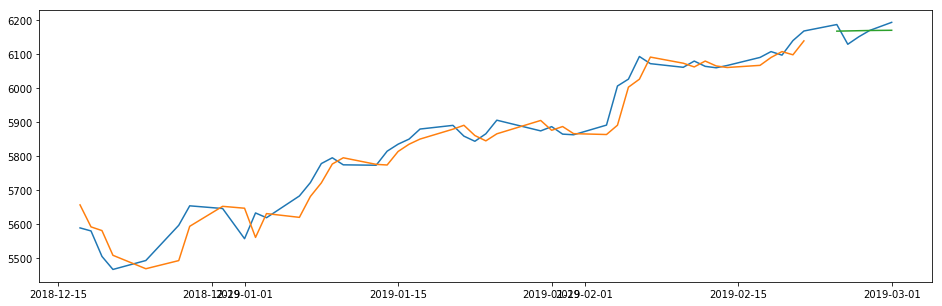

In [35]:
plt.figure(figsize = (16,5))
plt.plot(close_daily[-50:])
plt.plot(smooth_Holt[-45:])

plt.plot(forecast_set)


In [36]:
validation_set = np.exp(close_daily_log[-validation_size:].values)
print("RMSE for Holt’s linear method\n",rmse(forecast_set,validation_set))

RMSE for Holt’s linear method
 23.53221325836051


In [37]:
#Holt’s linear method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit = ExponentialSmoothing(train_close_daily, trend = 'add').fit()

/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [38]:
results = pd.DataFrame(index=[r"$\alpha$", 
                              r"$\beta$", 
                              r"$\phi$",  # damped value
                              r"$\gamma$", 
                              r"$l_0$", 
                              "$b_0$", 
                              "SSE"])
params = ['smoothing_level', 
          'smoothing_slope', 
          'damping_slope', 
          'smoothing_seasonal', 
          'initial_level', 
          'initial_slope']

results["Additive"] = [fit.params[p] for p in params] + [fit.sse]
results

,Additive
$\alpha$,9.647889e-01
$\beta$,0.000000e+00
$\phi$,NaN
$\gamma$,NaN
$l_0$,3.134668e+03
$b_0$,6.296182e-01
SSE,1.000626e+07


In [39]:
forecast_set = fit.forecast(validation_size)
forecast_set.index = validation_close_daily.index
smooth_add = fit.fittedvalues


/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [40]:
forecast_set

Date
2019-02-24    6166.910470
2019-02-25    6167.540088
2019-02-26    6168.169706
2019-02-27    6168.799324
2019-03-01    6169.428942
dtype: float64

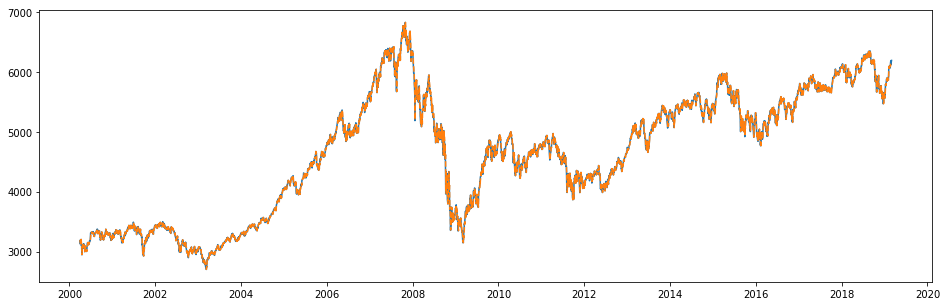

In [41]:
plt.figure(figsize = (16,5))
plt.plot(close_daily)

plt.plot(smooth_add,linestyle='--')

In [42]:
print("SSE of train set for ARIMA\n",sse(smooth_add,train_close_daily))

SSE of train set for ARIMA
 10006259.821413718


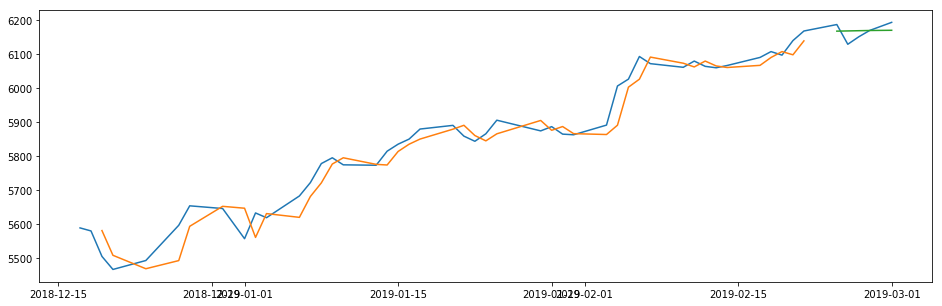

In [43]:
plt.figure(figsize = (16,5))
plt.plot(close_daily[-50:])
plt.plot(smooth_add[-43:])

plt.plot(forecast_set)

In [44]:
validation_set = np.exp(close_daily_log[-validation_size:].values)
print("SSE for Holt’s linear method\n",sse(forecast_set,validation_set))

SSE for Holt’s linear method
 2768.825304184791


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


## Build Advanced Models: 

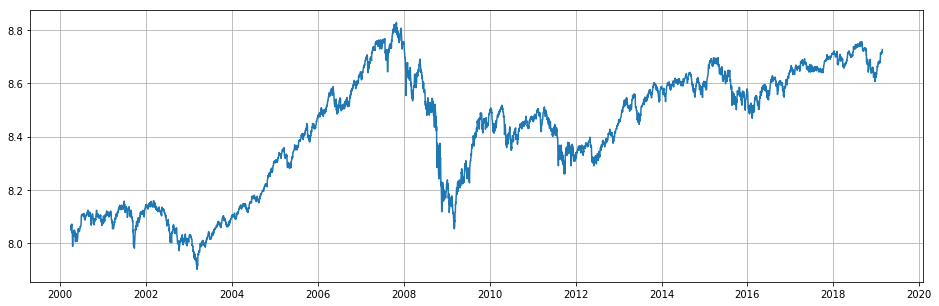

In [45]:
#ARIMA
plt.figure(figsize = (16,5))
plt.grid()
plt.plot(train_close_daily_log)

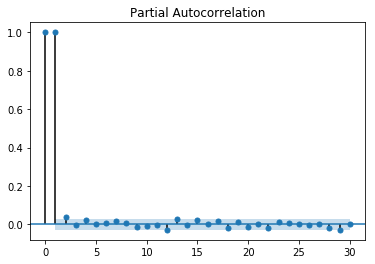

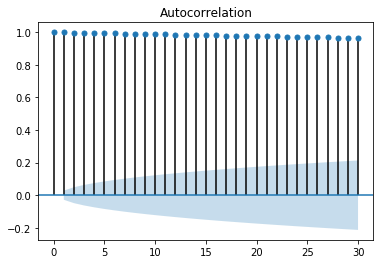

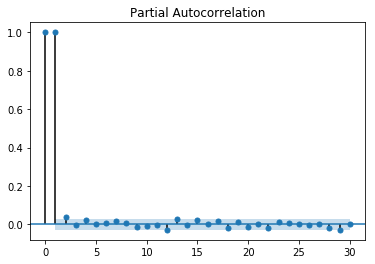

In [46]:
smt.graphics.tsa.plot_acf(train_close_daily_log, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(train_close_daily_log, lags=30, alpha = 0.05)

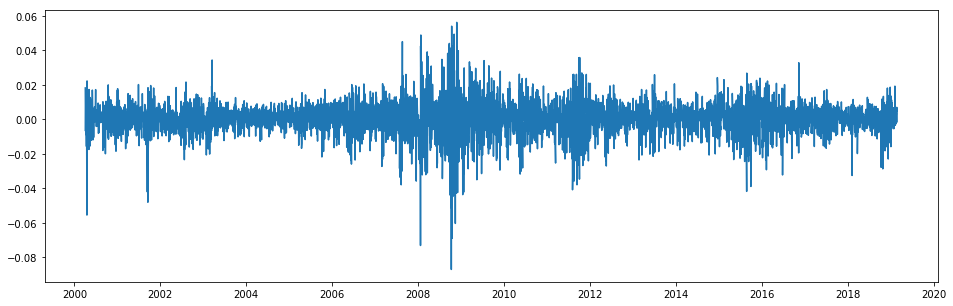

In [47]:
train_close_daily_log_diff = train_close_daily_log.diff()
train_close_daily_log_diff.dropna(inplace = True)
plt.figure(figsize = (16,5))
plt.plot(train_close_daily_log_diff)

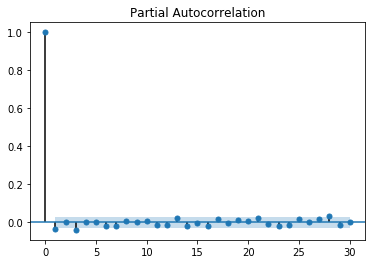

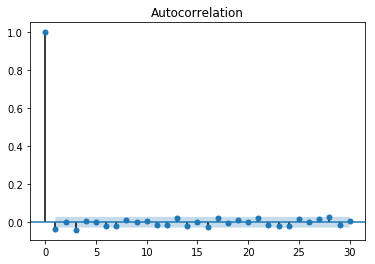

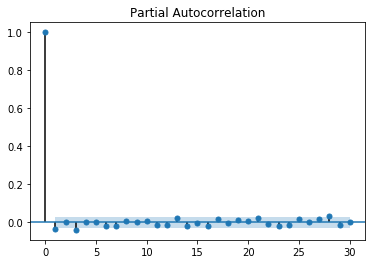

In [48]:
smt.graphics.tsa.plot_acf(train_close_daily_log_diff, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(train_close_daily_log_diff, lags=30, alpha = 0.05)

In [49]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
    print(dfoutput)


In [50]:
test_stationarity(train_close_daily_log_diff)


Results of Dickey-Fuller Test:
Test Statistic                  -42.112678
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    4812.000000
Critical Value (1%)              -3.431710
Critical Value (5%)              -2.862141
Critical Value (10%)             -2.567090
dtype: float64


In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,6

import warnings
warnings.simplefilter('ignore')


import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(train_close_daily_log_diff, max_ar = 5, max_ma = 5, ic=['aic'])
print(order.aic_min_order)

(4, 3)


In [52]:
from statsmodels.tsa.arima_model import ARIMA

p,q = order.aic_min_order[0], order.aic_min_order[1]
model_AIC = ARIMA(train_close_daily_log, order = (p, 1, q))  
results_AIC_ARIMA = model_AIC.fit(disp = -1)


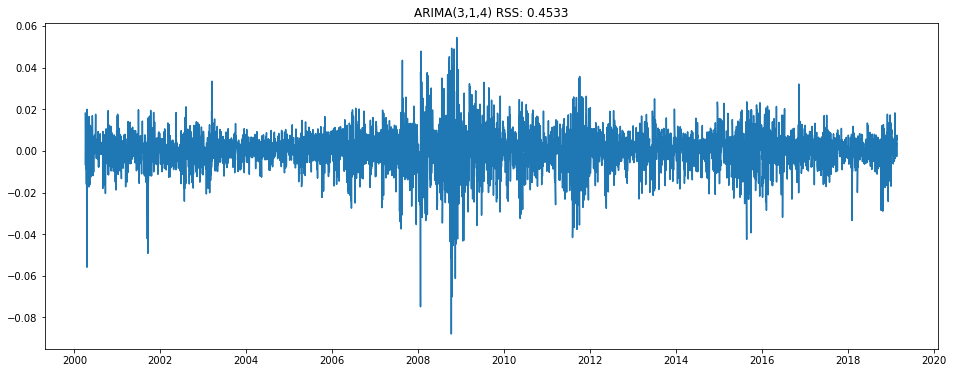

In [53]:
residuals = pd.DataFrame(results_AIC_ARIMA.resid) 

# check the residual
plt.figure() 
plt.plot(residuals)
plt.title('ARIMA(3,1,4) RSS: %.4f'% sum((results_AIC_ARIMA.resid.values)**2)); # residual sum of square

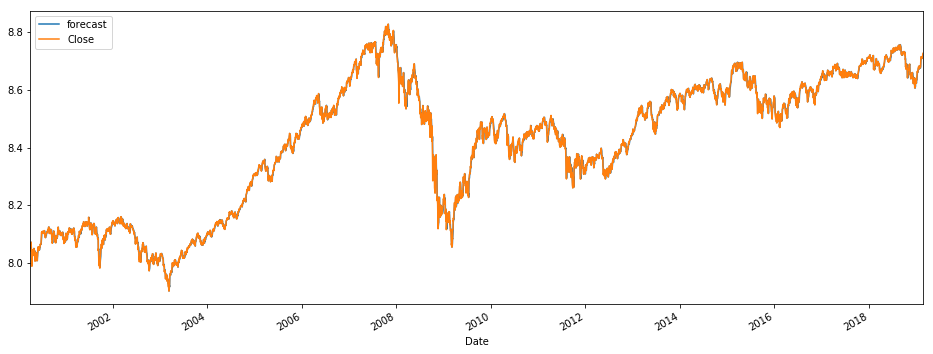

In [54]:
fitted_log = results_AIC_ARIMA.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted 
results_AIC_ARIMA.plot_predict(dynamic = False) 
plt.show()


In [55]:
fitted = np.exp(fitted_log)

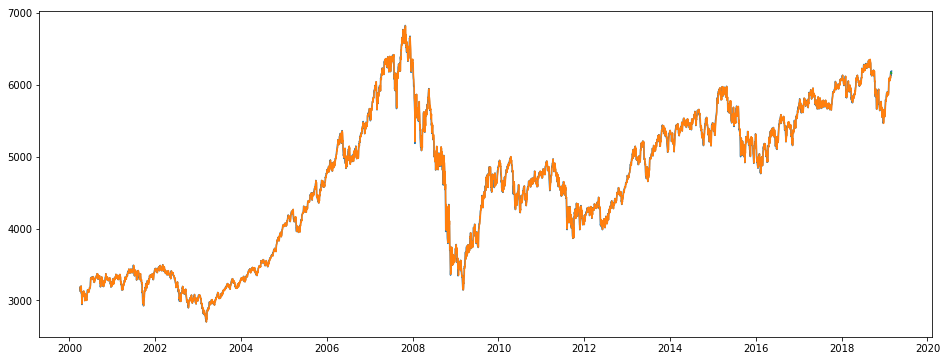

In [56]:
forecast, stderr, conf_int = results_AIC_ARIMA.forecast(steps = validation_size)
forecast_set = pd.Series(np.exp(forecast), index = validation_close_daily.index)
plt.figure()
plt.plot(close_daily)
plt.plot(fitted)

plt.plot(forecast_set)


In [57]:
train_close_daily

Date
2000-03-31    3133.300049
2000-04-03    3191.000000
2000-04-04    3176.800049
2000-04-05    3155.399902
2000-04-06    3157.100098
2000-04-07    3182.000000
2000-04-10    3201.399902
2000-04-11    3173.000000
2000-04-12    3148.699951
2000-04-13    3099.699951
2000-04-14    3111.899902
2000-04-17    2943.899902
2000-04-18    3010.300049
2000-04-19    3069.199951
2000-04-20    3069.199951
2000-04-21    3069.199951
2000-04-24    3069.199951
2000-04-25    3069.199951
2000-04-26    3117.300049
2000-04-27    3106.300049
2000-04-28    3115.800049
2000-05-01    3102.000000
2000-05-02    3131.100098
2000-05-03    3107.500000
2000-05-04    3053.800049
2000-05-05    3107.199951
2000-05-08    3106.199951
2000-05-09    3086.100098
2000-05-10    3043.399902
2000-05-11    2996.399902
                 ...     
2019-01-10    5774.600098
2019-01-13    5773.399902
2019-01-14    5814.600098
2019-01-15    5835.200195
2019-01-16    5850.100098
2019-01-17    5879.600098
2019-01-20    5890.399902
2019-01

In [58]:
print("RMSE of train set for ARIMA\n",rmse(fitted,train_close_daily[:-1]))

RMSE of train set for ARIMA
 3.292552858854617


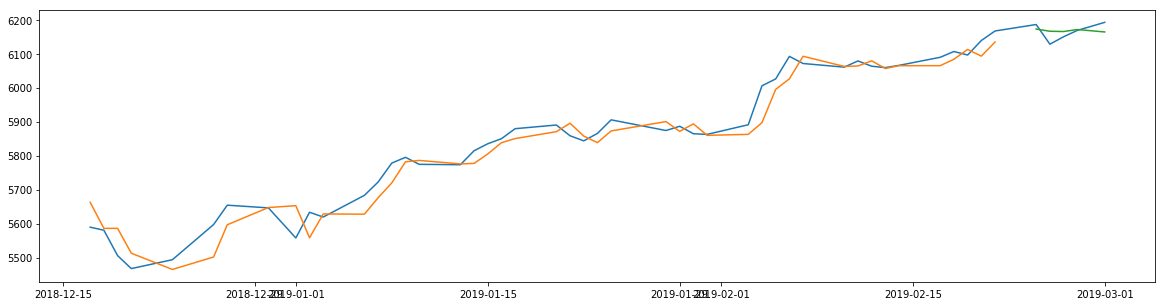

In [60]:
plt.figure(figsize = (20,5))
plt.plot(close_daily[-50:])
plt.plot(fitted[-(50-validation_size):])

plt.plot(forecast_set)

In [61]:
print("RMSE of test set for ARIMA\n",rmse(forecast_set,validation_set))

RMSE of test set for ARIMA
 23.10797958840657


In [62]:
# Deep Neural Networks and Recurrent Neural Networks

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense
from keras.models import Sequential

np.random.seed(0)

Using TensorFlow backend.


Text(0, 0.5, 'Close')

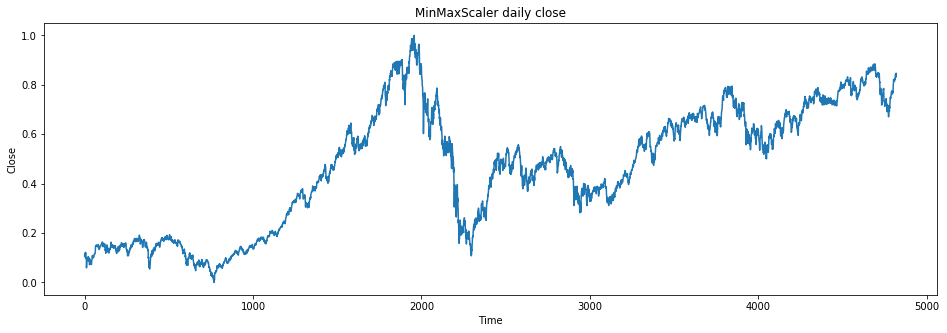

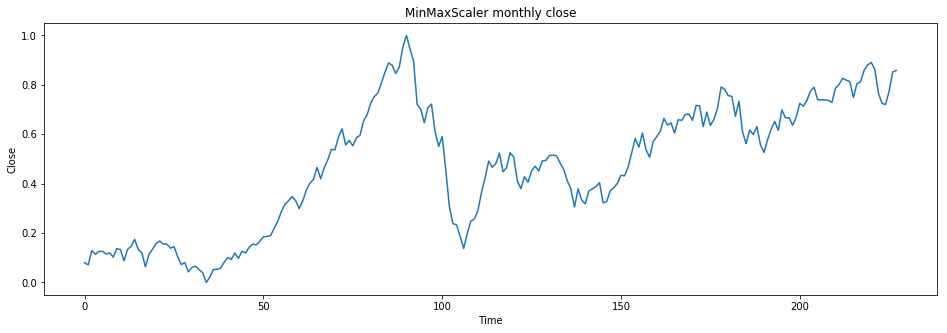

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close_daily_normalize = scaler.fit_transform(close_daily.values.reshape(-1,1))
close_monthly_normalize = scaler.fit_transform(close_monthly.values.reshape(-1,1))

plt.figure(figsize = (16,5))
plt.plot(close_daily_normalize)
plt.title("MinMaxScaler daily close")
plt.xlabel("Time")
plt.ylabel("Close")


plt.figure(figsize = (16,5))
plt.plot(close_monthly_normalize)
plt.title("MinMaxScaler monthly close")
plt.xlabel("Time")
plt.ylabel("Close")


In [118]:
data = close_daily_normalize
time_window = 5
Xall, Yall = [], []
for i in range(time_window, len(data)):
    Xall.append(data[i-time_window:i, 0])
    Yall.append(data[i, 0])
    
Xall = np.array(Xall) # Convert them from list to array
Yall = np.array(Yall)
test_size = 5
train_size =  len(Xall) - test_size

Xtrain = Xall[:train_size, :]
Ytrain = Yall[:train_size]
Xtest = Xall[-test_size:, :]
Ytest = Yall[-test_size:]


In [119]:
# model = Sequential()
# model.add(Dense(20, input_dim=time_window,activation='relu'))
# model.add(Dense(1))


def create_model():
# create model
    model = Sequential()
    model.add(Dense(20, input_dim=time_window,activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
    return model

In [104]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_model, verbose=2)

#batch_size = [1,2,5, 10, 20, 40, 60, 80, 100]
batch_size = [1,2,5,20, 50, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv = 5)

grid_result = grid.fit(Xtrain, Ytrain)

Epoch 1/50
 - 1s - loss: 0.0026 - acc: 4.1571e-04
Epoch 2/50
 - 1s - loss: 1.9812e-04 - acc: 4.1571e-04
Epoch 3/50
 - 1s - loss: 2.0011e-04 - acc: 4.1571e-04
Epoch 4/50
 - 1s - loss: 2.0238e-04 - acc: 4.1571e-04
Epoch 5/50
 - 1s - loss: 1.9981e-04 - acc: 4.1571e-04
Epoch 6/50
 - 1s - loss: 1.8875e-04 - acc: 4.1571e-04
Epoch 7/50
 - 1s - loss: 1.8494e-04 - acc: 4.1571e-04
Epoch 8/50
 - 1s - loss: 1.8675e-04 - acc: 4.1571e-04
Epoch 9/50
 - 1s - loss: 1.7885e-04 - acc: 4.1571e-04
Epoch 10/50
 - 1s - loss: 1.7733e-04 - acc: 4.1571e-04
Epoch 11/50
 - 1s - loss: 1.7822e-04 - acc: 4.1571e-04
Epoch 12/50
 - 1s - loss: 1.7093e-04 - acc: 4.1571e-04
Epoch 13/50
 - 1s - loss: 1.6287e-04 - acc: 4.1571e-04
Epoch 14/50
 - 1s - loss: 1.7363e-04 - acc: 4.1571e-04
Epoch 15/50
 - 1s - loss: 1.6491e-04 - acc: 4.1571e-04
Epoch 16/50
 - 1s - loss: 1.6536e-04 - acc: 4.1571e-04
Epoch 17/50
 - 1s - loss: 1.5927e-04 - acc: 4.1571e-04
Epoch 18/50
 - 1s - loss: 1.5529e-04 - acc: 4.1571e-04
Epoch 19/50
 - 1s - los

In [105]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000134 using {'batch_size': 5, 'epochs': 50}
-0.000167 (0.000080) with: {'batch_size': 1, 'epochs': 10}
-0.000165 (0.000089) with: {'batch_size': 1, 'epochs': 50}
-0.000204 (0.000071) with: {'batch_size': 1, 'epochs': 100}
-0.000166 (0.000097) with: {'batch_size': 2, 'epochs': 10}
-0.000151 (0.000078) with: {'batch_size': 2, 'epochs': 50}
-0.000159 (0.000068) with: {'batch_size': 2, 'epochs': 100}
-0.000162 (0.000090) with: {'batch_size': 5, 'epochs': 10}
-0.000134 (0.000079) with: {'batch_size': 5, 'epochs': 50}
-0.000176 (0.000116) with: {'batch_size': 5, 'epochs': 100}
-0.000264 (0.000227) with: {'batch_size': 20, 'epochs': 10}
-0.000146 (0.000094) with: {'batch_size': 20, 'epochs': 50}
-0.000135 (0.000085) with: {'batch_size': 20, 'epochs': 100}
-0.000269 (0.000159) with: {'batch_size': 50, 'epochs': 10}
-0.000136 (0.000072) with: {'batch_size': 50, 'epochs': 50}
-0.000144 (0.000073) with: {'batch_size': 50, 'epochs': 100}
-0.000403 (0.000269) with: {'batch_size': 100, 'ep

In [120]:
batch_size = grid_result.best_params_['batch_size']
epochs = grid_result.best_params_["epochs"]


In [111]:
model = Sequential()
model.add(Dense(20, input_dim=time_window,activation='relu'))
model.add(Dense(1))

In [112]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,verbose=2, validation_split=0.05)

Train on 4570 samples, validate on 241 samples
Epoch 1/50
 - 1s - loss: 0.0097 - val_loss: 2.6626e-04
Epoch 2/50
 - 1s - loss: 2.0851e-04 - val_loss: 1.5392e-04
Epoch 3/50
 - 1s - loss: 1.8684e-04 - val_loss: 1.7068e-04
Epoch 4/50
 - 1s - loss: 1.6159e-04 - val_loss: 2.3303e-04
Epoch 5/50
 - 1s - loss: 1.6783e-04 - val_loss: 1.1092e-04
Epoch 6/50
 - 1s - loss: 1.6966e-04 - val_loss: 2.4642e-04
Epoch 7/50
 - 1s - loss: 1.8135e-04 - val_loss: 1.3594e-04
Epoch 8/50
 - 1s - loss: 1.8320e-04 - val_loss: 2.6351e-04
Epoch 9/50
 - 1s - loss: 1.6614e-04 - val_loss: 1.0528e-04
Epoch 10/50
 - 1s - loss: 1.7302e-04 - val_loss: 1.2384e-04
Epoch 11/50
 - 1s - loss: 1.7336e-04 - val_loss: 1.6314e-04
Epoch 12/50
 - 1s - loss: 1.7642e-04 - val_loss: 4.6705e-04
Epoch 13/50
 - 1s - loss: 1.6251e-04 - val_loss: 1.8473e-04
Epoch 14/50
 - 1s - loss: 1.8009e-04 - val_loss: 1.6934e-04
Epoch 15/50
 - 1s - loss: 1.7223e-04 - val_loss: 1.0079e-04
Epoch 16/50
 - 1s - loss: 1.6873e-04 - val_loss: 2.6333e-04
Epoch 

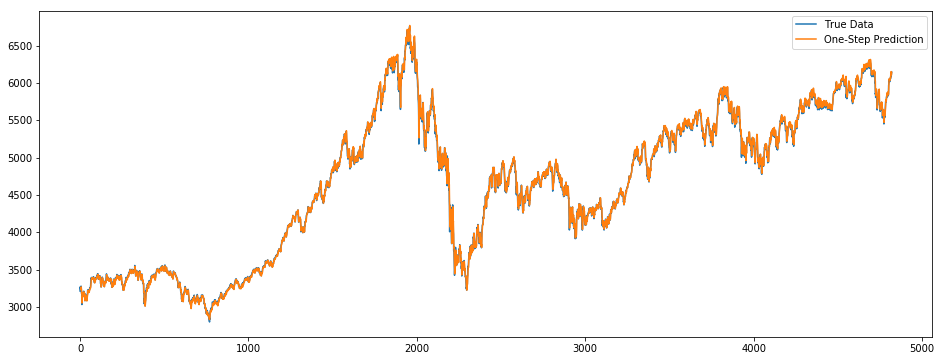

In [115]:
allPredict = model.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)
plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window, len(data)),allPredictPlot, label='One-Step Prediction')
plt.legend()


In [121]:
Ytrain_ = scaler.inverse_transform(Ytrain.reshape(-1, 1))
allPredict_ = scaler.inverse_transform(allPredict[:train_size,0].reshape(-1, 1))
print("RMSE of train set for NN\n",rmse(Ytrain_,allPredict_))

RMSE of train set for NN
 45.09921951919848


In [69]:
dynamic_prediction = np.copy(data[:len(data) - test_size])
for i in range(len(data) - test_size, len(data)):
    last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window))
    next_pred = model.predict(last_feature)
    dynamic_prediction = np.append(dynamic_prediction, next_pred)
    
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction = scaler.inverse_transform(dynamic_prediction)

validation


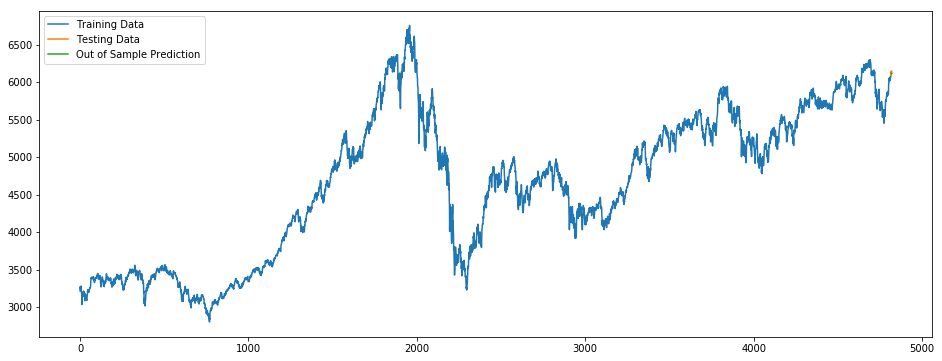

In [70]:
plt.figure()
plt.plot(scaler.inverse_transform(data[:len(data) - test_size]), label='Training Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1),scaler.inverse_transform(data[-test_size:]), label='Testing Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1), dynamic_prediction[-test_size:], label='Out of Sample Prediction')
plt.legend(loc = "upper left")



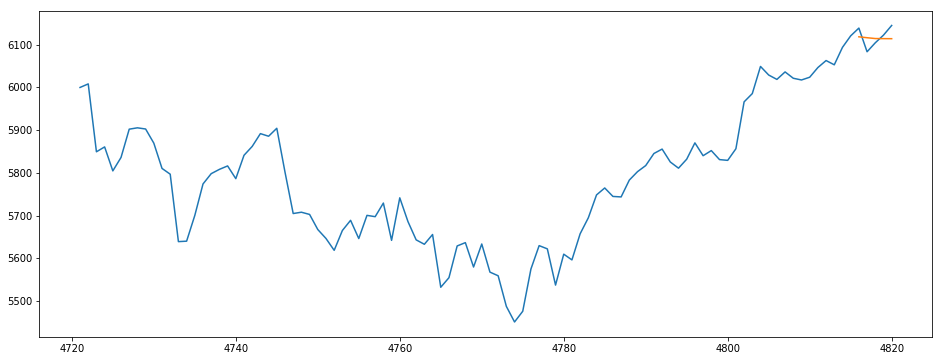

In [92]:
plt.figure()
plt.plot(np.arange(len(data)-100, len(data), 1),scaler.inverse_transform(data[-100:]), label='Training Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1),dynamic_prediction[-test_size:], label='Testing Data')
plt.show()

#plt.plot(np.arange(len(data) - test_size, len(data), 1),scaler.inverse_transform(data[-test_size:]), label='Testing Data')


In [72]:

dynamic_prediction[-test_size:]

array([[6118.52855481],
       [6116.38126689],
       [6114.45429216],
       [6114.22502505],
       [6114.10320481]])

In [73]:
testScore = rmse(scaler.inverse_transform(Ytest.reshape(-1, 1)),dynamic_prediction[-test_size:])
print('Dynamic Forecast RMSE: {0:.2f}'.format(testScore))

Dynamic Forecast RMSE: 22.91


# Forecast

# Monthly

In [74]:
validation_size = 5

train_size = len(close_monthly) - validation_size

In [75]:
train_close_monthly = close_monthly[:-validation_size]
validation_close_monthly  =  close_monthly[-validation_size:]
validation_close_monthly
validate_time = validation_close_monthly.index[0]

# Holt's linear model

In [76]:
from statsmodels.tsa.holtwinters import Holt
fit4 = Holt(train_close_monthly).fit()
smooth_Holt = fit4.fittedvalues


results = pd.DataFrame(index=[r"$\alpha$", 
                              r"$\beta$", 
                              r"$\phi$",  # damped value
                              r"$\gamma$", 
                              r"$l_0$", 
                              "$b_0$", 
                              "SSE"])
params = ['smoothing_level', 
          'smoothing_slope', 
          'damping_slope', 
          'smoothing_seasonal', 
          'initial_level', 
          'initial_slope']

results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
results


,Additive
$\alpha$,1.000000e+00
$\beta$,0.000000e+00
$\phi$,NaN
$\gamma$,NaN
$l_0$,3.103576e+03
$b_0$,1.222738e+01
SSE,6.598045e+06


In [77]:
smooth_Holt

Date
2000-03-31    3115.803706
2000-04-30    3128.027430
2000-05-31    3093.227381
2000-06-30    3323.427332
2000-07-31    3263.327479
2000-08-31    3310.027430
2000-09-30    3311.027430
2000-10-31    3266.827479
2000-11-30    3286.827479
2000-12-31    3218.427332
2001-01-31    3353.927332
2001-02-28    3338.727381
2001-03-31    3159.427332
2001-04-30    3341.627283
2001-05-31    3391.327479
2001-06-30    3502.527430
2001-07-31    3336.727381
2001-08-31    3287.827479
2001-09-30    3061.727381
2001-10-31    3261.827479
2001-11-30    3349.727381
2001-12-31    3434.527430
2002-01-31    3476.427332
2002-02-28    3426.527430
2002-03-31    3427.027430
2002-04-30    3362.227381
2002-05-31    3385.827479
2002-06-30    3228.227381
2002-07-31    3098.427332
2002-08-31    3132.327479
                 ...     
2016-04-30    5264.427576
2016-05-31    5390.827479
2016-06-30    5245.627283
2016-07-31    5574.527186
2016-08-31    5445.227381
2016-09-30    5448.127283
2016-10-31    5329.927576
2016-11

In [78]:
close_monthly

Date
2000-03-31    3115.800049
2000-04-30    3081.000000
2000-05-31    3311.199951
2000-06-30    3251.100098
2000-07-31    3297.800049
2000-08-31    3298.800049
2000-09-30    3254.600098
2000-10-31    3274.600098
2000-11-30    3206.199951
2000-12-31    3341.699951
2001-01-31    3326.500000
2001-02-28    3147.199951
2001-03-31    3329.399902
2001-04-30    3379.100098
2001-05-31    3490.300049
2001-06-30    3324.500000
2001-07-31    3275.600098
2001-08-31    3049.500000
2001-09-30    3249.600098
2001-10-31    3337.500000
2001-11-30    3422.300049
2001-12-31    3464.199951
2002-01-31    3414.300049
2002-02-28    3414.800049
2002-03-31    3350.000000
2002-04-30    3373.600098
2002-05-31    3216.000000
2002-06-30    3086.199951
2002-07-31    3120.100098
2002-08-31    2970.899902
                 ...     
2016-09-30    5317.700195
2016-10-31    5440.500000
2016-11-30    5665.799805
2016-12-31    5620.899902
2017-01-31    5712.200195
2017-02-28    5864.899902
2017-03-31    5924.100098
2017-04

In [79]:
forecast_set = pd.Series(fit4.forecast(validation_size))

forecast_set.index = validation_close_monthly.index
forecast_set

Date
2018-10-31    5842.527186
2018-11-30    5854.754567
2018-12-31    5866.981948
2019-01-31    5879.209329
2019-03-01    5891.436710
dtype: float64

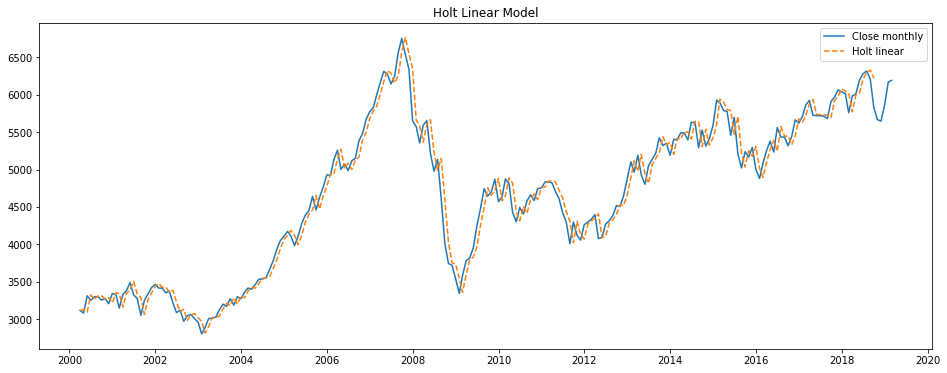

In [80]:
plt.figure()
plt.title('Holt Linear Model')
plt.plot(close_monthly,label='Close monthly')
plt.plot(smooth_Holt,linestyle='--',label='Holt linear')
plt.legend();

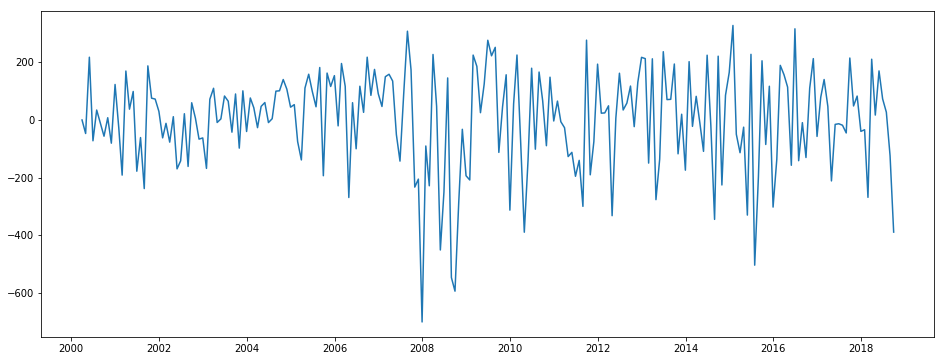

In [81]:
plt.figure()
plt.plot(fit4.resid)
plt.show()

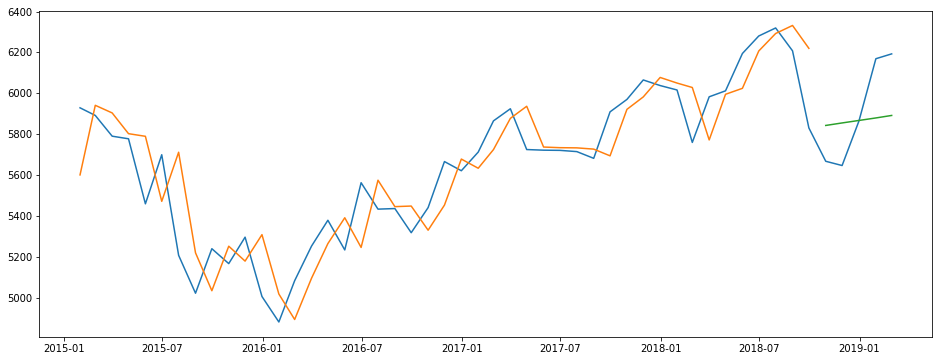

In [82]:
plt.figure()
plt.plot(close_monthly[-50:])
plt.plot(smooth_Holt[-(50-validation_size):])
plt.plot(forecast_set)
plt.show()

In [83]:
print("RMSE of train set for HOLT\n{:.2f}".format(rmse(smooth_Holt,train_close_monthly)))

RMSE of train set for HOLT
172.01


In [84]:
validation_set = close_monthly[-validation_size:].values
print("RMSE for Holt’s linear method on validation set\n{:.2f}".format(rmse(forecast_set,validation_set)))

RMSE for Holt’s linear method on validation set
223.11


# ARIMA

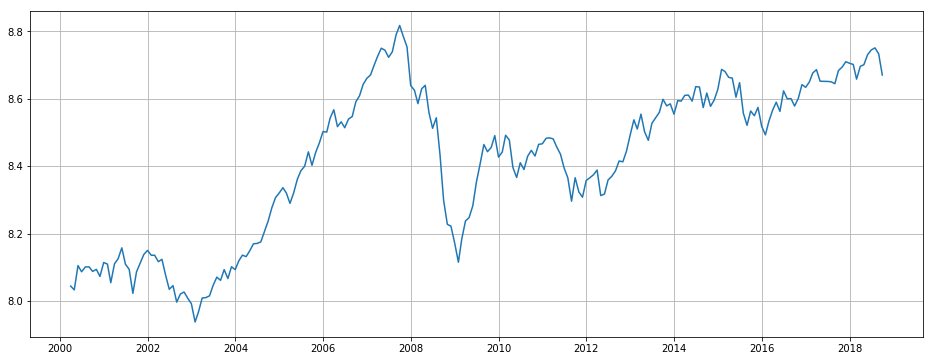

In [85]:
close_monthly_log = np.log(close_monthly)
train_close_monthly_log = np.log(train_close_monthly)
validation_close_monthly_log = np.log(validation_close_monthly)


plt.figure()
plt.grid()
plt.plot(train_close_monthly_log);

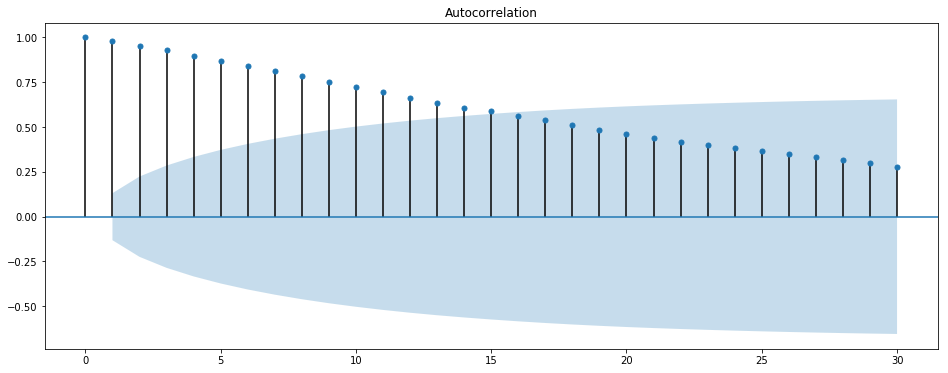

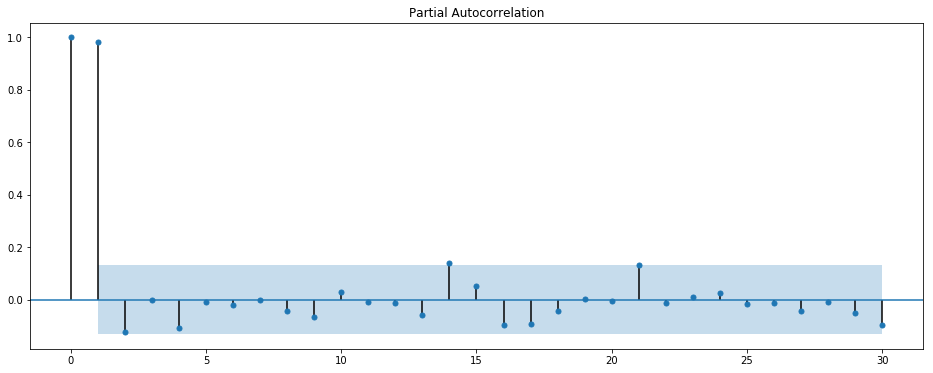

In [86]:
smt.graphics.tsa.plot_acf(train_close_monthly_log, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(train_close_monthly_log, lags=30, alpha = 0.05)
plt.show()

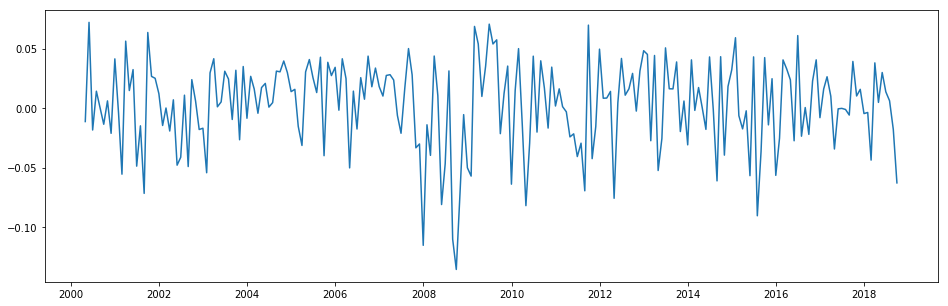

In [87]:
train_close_monthly_log_diff = train_close_monthly_log.diff()
train_close_monthly_log_diff.dropna(inplace = True)
plt.figure(figsize = (16,5))
plt.plot(train_close_monthly_log_diff);

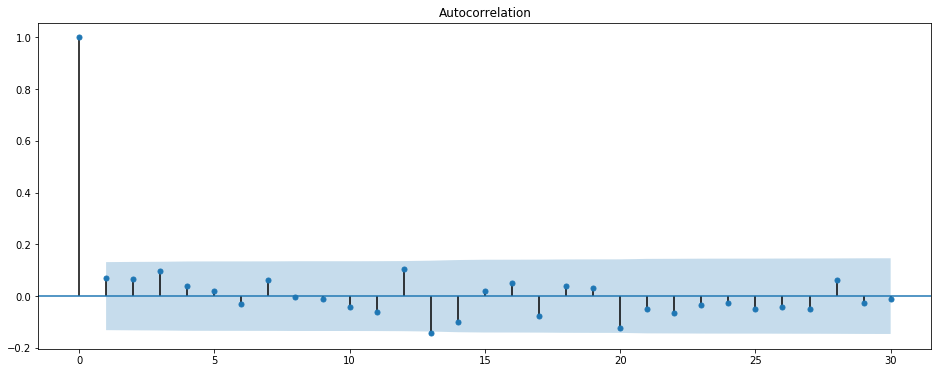

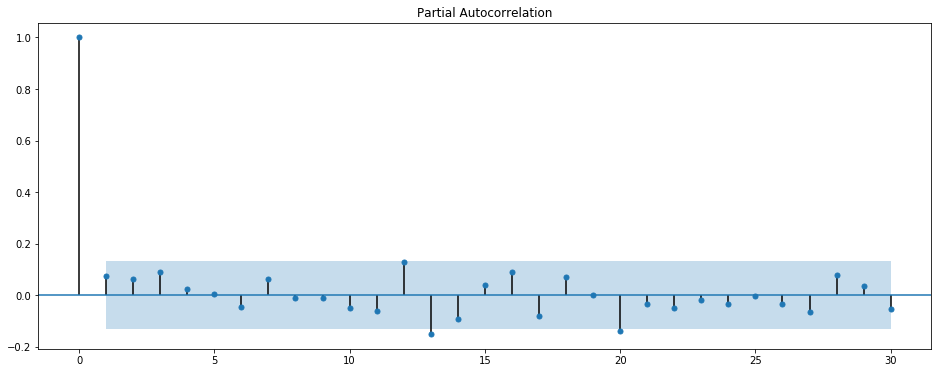

In [88]:
smt.graphics.tsa.plot_acf(train_close_monthly_log_diff, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(train_close_monthly_log_diff, lags=30, alpha = 0.05)
plt.show()

In [ ]:
test_stationarity(train_close_monthly_log_diff)


In [ ]:
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(train_close_monthly_log_diff, max_ar = 5, max_ma = 5, ic=['aic'])
print(order.aic_min_order)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

p,q = order.aic_min_order[0], order.aic_min_order[1]
model_AIC = ARIMA(train_close_monthly_log, order = (p, 1, q))  
results_AIC_ARIMA = model_AIC.fit(disp = -1)

In [ ]:
residuals = pd.DataFrame(results_AIC_ARIMA.resid) 

# check the residual
plt.figure() 
plt.plot(residuals)
plt.title('ARIMA(0,1,0) RSS: %.2f'% sum((results_AIC_ARIMA.resid.values)**2)); # residual sum of square

In [ ]:
fitted_log = results_AIC_ARIMA.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted 
results_AIC_ARIMA.plot_predict(dynamic = False) 
plt.show()

In [ ]:
fitted = np.exp(fitted_log)
forecast, stderr, conf_int = results_AIC_ARIMA.forecast(steps = validation_size)
forecast_set = pd.Series(np.exp(forecast), index = validation_close_monthly.index)
plt.figure()
plt.plot(close_monthly)
plt.plot(fitted)
plt.plot(forecast_set)
plt.show()

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(close_monthly[-50:])
plt.plot(fitted[-(50-validation_size):])
plt.plot(forecast_set);

In [ ]:
print("RMSE of train set for ARIMA\n{:.2f}".format(rmse(fitted,train_close_monthly[:-1])))
train_close_monthly


In [ ]:
train_close_monthly[:-1]

In [ ]:
print("RMSE of test set for ARIMA\n{:.2f}".format(rmse(forecast_set,validation_set)))

## NN

In [ ]:


scaler = MinMaxScaler()
close_monthly_normalize = scaler.fit_transform(close_monthly.values.reshape(-1,1))
close_monthly_normalize = scaler.fit_transform(close_monthly.values.reshape(-1,1))

plt.figure(figsize = (16,5))
plt.plot(close_monthly_normalize)
plt.title("MinMaxScaler monthly close")
plt.xlabel("Time")
plt.ylabel("Close");



In [ ]:
data = close_monthly_normalize
time_window = 5
Xall, Yall = [], []
for i in range(time_window, len(data)):
    Xall.append(data[i-time_window:i, 0])
    Yall.append(data[i, 0])
    
Xall = np.array(Xall) # Convert them from list to array
Yall = np.array(Yall)
test_size = 5
train_size =  len(Xall) - test_size

Xtrain = Xall[:train_size, :]
Ytrain = Yall[:train_size]
Xtest = Xall[-test_size:, :]
Ytest = Yall[-test_size:]

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=time_window,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(Xtrain, Ytrain, epochs=100, batch_size=2,verbose=2, validation_split=0.05)

In [ ]:
allPredict = model.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)
plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window, len(data)),allPredictPlot, label='One-Step Prediction')
plt.legend(); 
Ytrain.shape

In [ ]:
Ytrain_ = scaler.inverse_transform(Ytrain.reshape(-1, 1))
allPredict_ = scaler.inverse_transform(allPredict[:train_size,0].reshape(-1, 1))
print("RMSE of train set for NN\n",rmse(Ytrain_,allPredict_))

In [ ]:
dynamic_prediction = np.copy(data[:len(data) - test_size])
for i in range(len(data) - test_size, len(data)):
    last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window))
    next_pred = model.predict(last_feature)
    dynamic_prediction = np.append(dynamic_prediction, next_pred)
    
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction = scaler.inverse_transform(dynamic_prediction)


In [ ]:
plt.figure()
plt.plot(scaler.inverse_transform(data[:len(data) - test_size]), label='Training Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1),scaler.inverse_transform(data[-test_size:]), label='Testing Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1), dynamic_prediction[-test_size:], label='Out of Sample Prediction')
plt.legend(loc = "upper left")


In [ ]:
Ytest
dynamic_prediction[-test_size:]


In [ ]:
testScore = rmse(scaler.inverse_transform(Ytest.reshape(-1, 1)),dynamic_prediction[-test_size:])
print('Dynamic Forecast RMSE: {0:.2f}'.format(testScore))